In [1]:
import tensorflow
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Indians_Diabetes_Dataset_Week 1.csv")

In [3]:
df.describe()

,Pregnancies,Glucose Level,Blood Pressure Level,Skin Thickness,Insulin Level,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                   0
Glucose Level                 0
Blood Pressure Level          0
Skin Thickness                0
Insulin Level                 0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

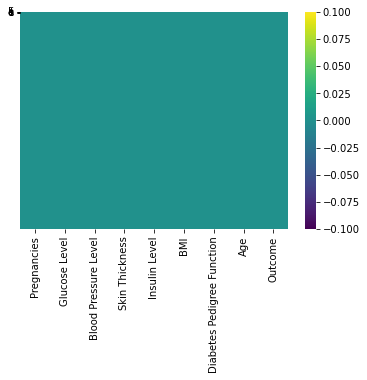

In [5]:
sns.heatmap(df.isnull(),yticklabels="False",cmap='viridis')

In [40]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose Level,Blood Pressure Level,Skin Thickness,Insulin Level,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose Level,Blood Pressure Level,Skin Thickness,Insulin Level,BMI,Diabetes Pedigree Function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
x=df.iloc[:,:-1]


In [4]:
x

,Pregnancies,Glucose Level,Blood Pressure Level,Skin Thickness,Insulin Level,BMI,Diabetes Pedigree Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y=df.iloc[:,-1:]


In [27]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


## Standard scalar

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X=scaler.fit_transform(x)

## Splitting the data into training and test data


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [9]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (537, 8)
X_test (231, 8)
y_train (537, 1)
y_test (231, 1)


## Bagging Classifier Model

In [10]:
from sklearn.ensemble import BaggingClassifier

In [11]:
BC=BaggingClassifier()
BC= BC.fit(X_train , y_train)
BC

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier()

In [12]:
bc=BC.score(X_test, y_test)
print('Test set\n Accuracy: {:0.2f}'.format(BC.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
 Accuracy: 0.73


## Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
Rn = RandomForestClassifier(n_estimators=4,criterion='entropy',random_state=0)
Rn=Rn.fit(X_train,y_train)

C:\Users\User\AppData\Local\Temp/ipykernel_15688/2414167481.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rn=Rn.fit(X_train,y_train)


In [14]:
rn=Rn.score(X_test, y_test)
print('Test set\n Accuracy: {:0.2f}'.format(Rn.score(X_test, y_test))) #the accuracy of the model on test data is given below

Test set
 Accuracy: 0.73


## Comparison of Bagging and Random forest Models

In [15]:
from prettytable import PrettyTable

In [16]:
x = PrettyTable()
print('\n')

In [17]:
x.field_names = ["Model", "Accuracy"]
x.add_row(["Bagging classifier Model", round(bc,2)])
x.add_row(["Random forest model", round(rn,2)])

In [18]:
print(x)
print('\n')

+--------------------------+----------+
|          Model           | Accuracy |
+--------------------------+----------+
| Bagging classifier Model |   0.73   |
|   Random forest model    |   0.73   |
+--------------------------+----------+




## In the above two model accuracy are same of 73% 